<a href="https://colab.research.google.com/github/lucasANSilveira/Data-analysis-with-Pandas/blob/main/Planilhas_do_Excel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# **Trabalhando com planilhas Excel**

In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/Análise de dados com Pandas e Python/Aracaju.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/Análise de dados com Pandas e Python/Fortaleza.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/Análise de dados com Pandas e Python/Natal.xlsx')
df4 = pd.read_excel('/content/drive/MyDrive/Análise de dados com Pandas e Python/Recife.xlsx')
df5 = pd.read_excel('/content/drive/MyDrive/Análise de dados com Pandas e Python/Salvador.xlsx')


In [ ]:
# Juntando todos os arquivos
df = pd.concat([df1, df2, df3, df4, df5])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
df['Cidade'].unique()

array(['Aracaju', 'Fortaleza', 'Natal', 'Recife', 'Salvador'],
      dtype=object)

In [ ]:
df1['Cidade'].unique()

array(['Aracaju'], dtype=object)

In [ ]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
44,Recife,2019-01-01,142.21,983,8
0,Natal,2018-08-27,606.00,853,2
170,Salvador,2019-01-02,9.26,1035,3
56,Natal,2018-03-02,704.00,852,4
89,Salvador,2019-01-01,17.46,1034,1


In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
# Alterando o tipo de dado da coluna LojaID
df['LojaID'] = df['LojaID'].astype('object')

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
df['Vendas'].mean()

122.61180089485458

**Tratando valores faltantes**

In [ ]:
# Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
# Substituindo os valores nulos da média 
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
# Substituindo os valores nulos por zero
df['Vendas'].fillna(0, inplace=True)

In [ ]:
# Apagando os valores nulos por zero
df.dropna(how = 'all', inplace=True)

In [ ]:
df['Vendas'].mean()

122.61180089485458

**Criando colunas novas**

In [ ]:
# Criando a coluna de receita
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
# Retornando a maior receita
df['Receita'].max()

3544.0

In [ ]:
# Retornando a menor receita
df['Receita'].min()

3.34

In [ ]:
df.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [ ]:
df.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [ ]:
# Agrupamento por cidade
receitas = df.groupby('Cidade')['Receita'].sum()

In [ ]:
receitas.sort_values()

Cidade
Fortaleza     37913.97
Salvador      40596.73
Aracaju       48748.25
Recife        51936.51
Natal        167227.52
Name: Receita, dtype: float64

In [ ]:
# Ordenando o conjunto de dados
df.sort_values('Receita', ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


# **Trabalhando com datas**

In [ ]:
#Transformando a coluna de data em tipo inteiro
df['Data'] = df['Data'].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [ ]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [ ]:
# Transformando a coluna de data em data
df['Data'] = pd.to_datetime(df['Data'])

In [ ]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [ ]:
# Agrupamento por ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
df["Ano_Venda"] = df["Data"].dt.year

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
15,Natal,2018-02-01,432.00,854,3,1296.00,2018
134,Fortaleza,2019-03-02,195.18,980,5,975.90,2019
230,Natal,2019-01-03,184.69,1036,1,184.69,2019
30,Aracaju,2018-01-01,119.21,1520,8,953.68,2018
47,Aracaju,2018-01-01,80.46,1520,2,160.92,2018


In [ ]:
# Extraindo o ano, o mês e o dia
df['mes_venda'], df['dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [ ]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
23,Recife,2019-01-01,37.51,982,2,75.02,2019,1,1
5,Natal,2019-03-30,674.00,854,2,1348.00,2019,3,30
60,Natal,2018-05-02,534.00,852,3,1602.00,2018,5,2
57,Natal,2019-02-24,425.00,854,4,1700.00,2019,2,24
0,Fortaleza,2019-01-01,45.27,1002,2,90.54,2019,1,1
111,Natal,2019-01-02,147.35,1037,2,294.70,2019,1,2
151,Salvador,2019-01-02,14.63,1035,1,14.63,2019,1,2
25,Salvador,2019-01-01,220.62,1035,1,220.62,2019,1,1
12,Salvador,2019-01-01,125.05,1034,3,375.15,2019,1,1
64,Salvador,2019-01-01,37.96,1037,3,113.88,2019,1,1


In [ ]:
df['mes_venda'].max()

12

In [ ]:
df['dia_venda'].max()

31

In [ ]:
# Retornando a soma de receita de cada mês
df.groupby(df['mes_venda'])['Qtde'].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
# Retornando a data mais antiga 
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
# Calculando a diferenca de dias
df['diferenca_dias'] = df['Data'] - df['Data'].min()

In [ ]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias
130,Salvador,2019-03-02,59.78,1036,1,59.78,2019,3,2,425 days
123,Fortaleza,2019-03-02,20.22,981,6,121.32,2019,3,2,425 days
14,Recife,2019-01-12,102.91,982,3,308.73,2019,1,12,376 days
35,Fortaleza,2019-01-01,133.97,1005,2,267.94,2019,1,1,365 days
132,Recife,2019-03-02,17.49,983,5,87.45,2019,3,2,425 days
62,Salvador,2019-01-01,161.02,1037,3,483.06,2019,1,1,365 days
78,Aracaju,2018-01-01,154.85,1522,9,1393.65,2018,1,1,0 days
117,Natal,2019-01-02,39.41,1034,1,39.41,2019,1,2,366 days
117,Recife,2019-03-02,15.42,983,8,123.36,2019,3,2,425 days
232,Salvador,2019-01-03,167.76,1034,3,503.28,2019,1,3,367 days


In [ ]:
# Criando a coluna trimestre
df['trimestre_venda'] = df['Data'].dt.quarter

In [ ]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
62,Recife,2019-01-01,23.04,983,6,138.24,2019,1,1,365 days,1
209,Natal,2019-01-02,69.98,1034,2,139.96,2019,1,2,366 days,1
122,Aracaju,2018-01-01,38.49,1522,4,153.96,2018,1,1,0 days,1
124,Natal,2019-01-02,44.82,1034,3,134.46,2019,1,2,366 days,1
108,Recife,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
65,Salvador,2019-01-01,3.39,1034,2,6.78,2019,1,1,365 days,1
26,Aracaju,2018-01-01,6.98,1521,10,69.80,2018,1,1,0 days,1
101,Salvador,2019-01-01,32.28,1035,3,96.84,2019,1,1,365 days,1
108,Natal,2019-01-02,11.72,1037,1,11.72,2019,1,2,366 days,1
79,Salvador,2019-01-01,19.02,1034,2,38.04,2019,1,1,365 days,1


In [ ]:
# Filtrando as vendas de 2019 no mês de março
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [ ]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


# **Visualização de dados**

In [ ]:
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

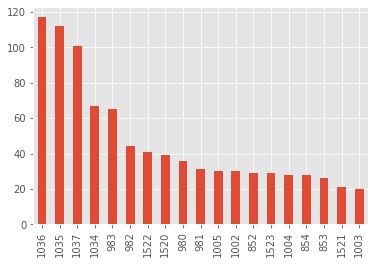

In [ ]:
# Gráfico de barras
df['LojaID'].value_counts(ascending=False).plot.bar();

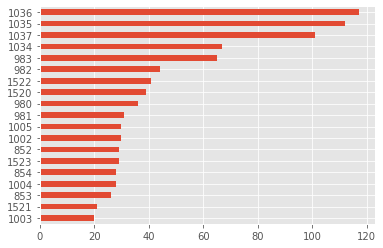

In [ ]:
# Gráfico de barras horizontais
df['LojaID'].value_counts(ascending=True).plot.barh();

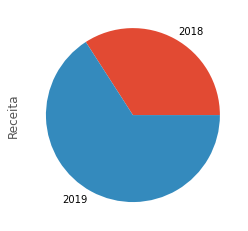

In [ ]:
# Gráfico de Pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie();

In [ ]:
# Total vendas por cidade
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

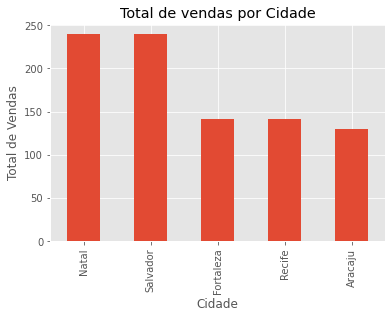

In [ ]:
# Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title = "Total de vendas por Cidade");
plt.xlabel('Cidade');
plt.ylabel('Total de Vendas');

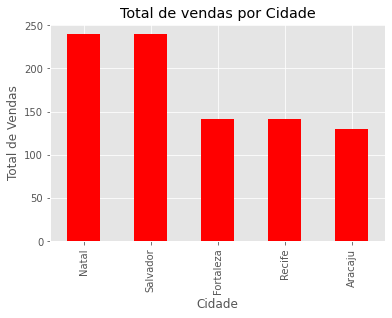

In [ ]:
# Alterando a cor
df['Cidade'].value_counts().plot.bar(title = "Total de vendas por Cidade", color = 'red');
plt.xlabel('Cidade');
plt.ylabel('Total de Vendas');

In [ ]:
# Alterando o estilo
plt.style.use('ggplot')

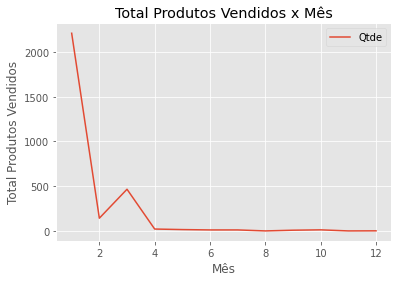

In [ ]:
df.groupby(df['mes_venda'])['Qtde'].sum().plot(title = 'Total Produtos Vendidos x Mês');
plt.xlabel('Mês');
plt.ylabel('Total Produtos Vendidos');
plt.legend();

In [ ]:
# Selecionando apenas as vendas de 2019
df_2019 = df[df['Ano_Venda'] == 2019]

In [ ]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

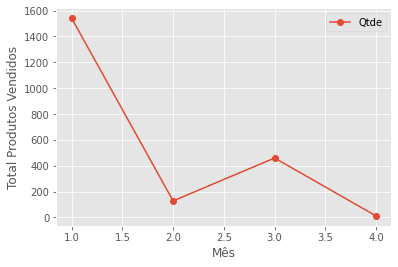

In [ ]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

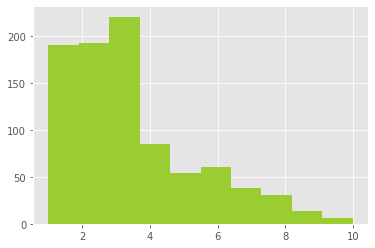

In [ ]:
# Histograma
plt.hist(df['Qtde'], color="yellowgreen");

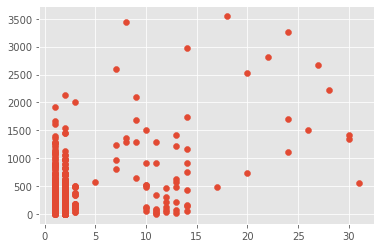

In [ ]:
plt.scatter(x=df_2019['dia_venda'], y=df_2019['Receita']);

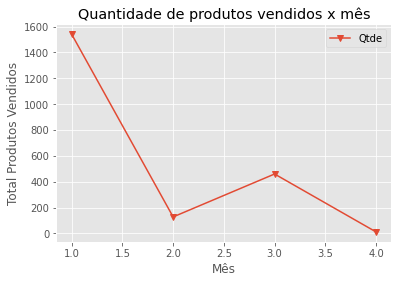

In [ ]:
# Salvando em png
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'v');
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")